In [1]:
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model
import pickle # saving and loading trained model
from os import path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
!pip  install wget

You should consider upgrading via the 'g:\pycharm projects\machine learning\venv\scripts\python.exe -m pip install --upgrade pip' command.



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9673 sha256=a28f685a859ca6ecd0f18a928bc2b0a356bfd83fdfc5a916fc82e2f9aa6891db
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\a1\b6\7c\0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [3]:
import wget
print('Downloading binary dataset.....')
data = wget.download('https://dl.dropboxusercontent.com/s/ceup379ooybbpyo/bin_data.csv?dl=0')

100% [........................................................................] 45887827 / 45887827

In [4]:
df = pd.read_csv(data)
df.drop(df.columns[0],axis=1,inplace=True)

In [5]:
display(df.shape)

(125973, 97)

<AxesSubplot:title={'center':'Continuous features'}>

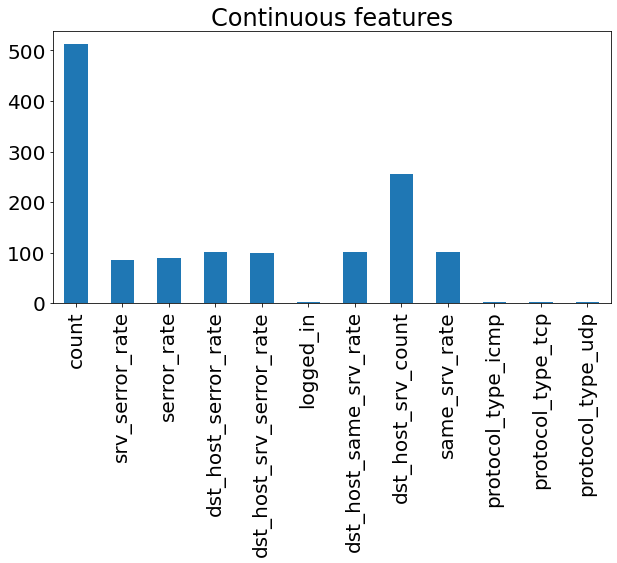

In [45]:
plt.title('Continuous features')
df.iloc[:,:12].nunique().plot(kind='bar', figsize=(10,5))

In [4]:
# df.info()
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
df['label']= label_encoder.fit_transform(df['label'])

# Extracting Continoues Features

passed only continous data to CNN for Featuring  

In [5]:
X = df[['count', 'srv_serror_rate', 'serror_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'logged_in', 'dst_host_same_srv_rate',
       'dst_host_srv_count', 'same_srv_rate']]
y = df['label']

In [6]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

### Building CNN

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Activation,Dropout 
from tensorflow.keras.layers import BatchNormalization 
from tensorflow.keras.utils import to_categorical

In [8]:
# deep learning model initialization
model = tf.keras.models.Sequential()  
model.add(Dense(1000,input_dim=X_train.shape[1],activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(75,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

New_X_train = model.predict(X_train)
New_X_test = model.predict(X_test)

### Evaluation Function

In [32]:
# function for evaluation metrics precision, recall, f1 etc
def modelEvaluation(predictions, y_test_set, model_name):
    import seaborn as sns
    from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
    from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score, f1_score
    # Print model evaluation to predicted result    
    print("==========",model_name,"==========")
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))    
    print ("\nClassification report : \n", classification_report(y_test_set, predictions))
#     print ("\nConfusion Matrix : \n", confusion_matrix(y_test_set, predictions))
    plt.rcParams.update({'font.size': 20})
    sns.heatmap(confusion_matrix(y_test_set, predictions),annot=True, fmt='g',cmap='viridis')
    plt.tight_layout()
    plt.show()
    results = [accuracy_score(y_test_set, predictions), precision_score(y_test_set, predictions, average='macro'),
              recall_score(y_test_set, predictions, average='macro'),f1_score(y_test_set, predictions, average='macro')]
    return results

## 1) Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier
qsvm=DecisionTreeClassifier()
qsvm.fit(New_X_train,y_train) # training model on training dataset

DecisionTreeClassifier()

In [11]:
y_pred=qsvm.predict(New_X_test)  # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("Decision Tree-Classifier Bin-class Set-Accuracy is ", ac)

Decision Tree-Classifier Bin-class Set-Accuracy is  94.71645392773227


### Evaluation of Decision Tree

========== Decision Tree Classifier ==========

Accuracy on validation set: 0.9395

Classification report : 
               precision    recall  f1-score   support

           0       0.97      0.91      0.94     15720
           1       0.91      0.97      0.94     15774

    accuracy                           0.94     31494
   macro avg       0.94      0.94      0.94     31494
weighted avg       0.94      0.94      0.94     31494



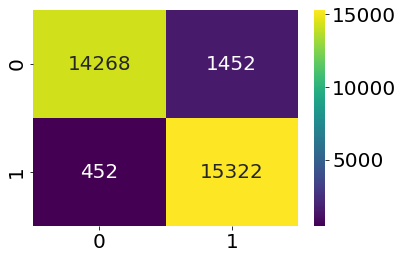

[0.9395440401346288,
 0.9413654705004122,
 0.9394894197331196,
 0.9394762523583889]

In [33]:
modelEvaluation(y_test, y_pred,'Decision Tree Classifier')

### 2) KNeighborsClassifier

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(New_X_train,y_train) # training model on training dataset
print('KNeighborsClassifier is trained')
y_pred=knn.predict(New_X_test)  # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("KNN-Classifier Bin-class Set-Accuracy is ", ac)

KNeighborsClassifier is trained
KNN-Classifier Bin-class Set-Accuracy is  93.95440401346288


### Evaluation of KNN Classifier

========== KNN Classifier ==========

Accuracy on validation set: 0.9395

Classification report : 
               precision    recall  f1-score   support

           0       0.97      0.91      0.94     15720
           1       0.91      0.97      0.94     15774

    accuracy                           0.94     31494
   macro avg       0.94      0.94      0.94     31494
weighted avg       0.94      0.94      0.94     31494



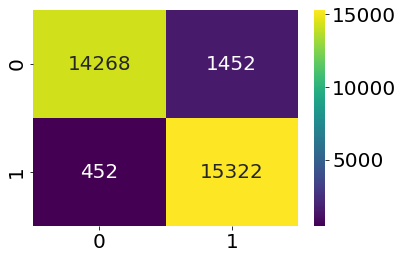

[0.9395440401346288,
 0.9413654705004122,
 0.9394894197331196,
 0.9394762523583889]

In [34]:
modelEvaluation(y_test, y_pred, "KNN Classifier")

### 3) Multi-Layer Perceptron

In [17]:
from keras.models import Sequential
from keras.layers import Activation, Dense
mlp = Sequential() # initializing model
# input layer and first layer with 50 neurons
mlp.add(Dense(units=128, input_dim=New_X_train.shape[1], activation='relu'))
mlp.add(Dense(units=64, activation='relu'))
# mlp.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
# output layer with softmax activation
mlp.add(Dense(units=1,activation='sigmoid'))

In [18]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
# training the model on training dataset
history = mlp.fit(New_X_train, y_train, epochs=25, batch_size=64,validation_split=0.2)

Epoch 1/25
1181/1181 [==============================] - 4s 2ms/step - loss: 0.2764 - accuracy: 0.8915 - val_loss: 0.2263 - val_accuracy: 0.9043oss: 0.2847 - accu
Epoch 2/25
1181/1181 [==============================] - 2s 2ms/step - loss: 0.2181 - accuracy: 0.9013 - val_loss: 0.2189 - val_accuracy: 0.9012
Epoch 3/25
1181/1181 [==============================] - 2s 2ms/step - loss: 0.2129 - accuracy: 0.9023 - val_loss: 0.2105 - val_accuracy: 0.9009curacy: 0.
Epoch 4/25
1181/1181 [==============================] - 2s 2ms/step - loss: 0.2082 - accuracy: 0.9052 - val_loss: 0.2053 - val_accuracy: 0.9103
Epoch 5/25
1181/1181 [==============================] - 2s 1ms/step - loss: 0.2048 - accuracy: 0.9070 - val_loss: 0.2090 - val_accuracy: 0.9077 loss: 0.2057  - ETA: 0s - loss: 0.2053 - accu
Epoch 6/25
1181/1181 [==============================] - 2s 2ms/step - loss: 0.2019 - accuracy: 0.9073 - val_loss: 0.2006 - val_accuracy: 0.9137
Epoch 7/25
1181/1181 [==============================] - 3s 2ms

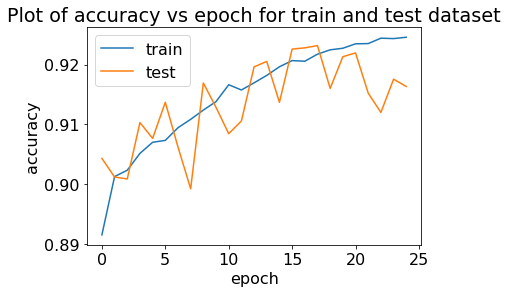

In [19]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
# plt.savefig('plots/mlp_multi_accuracy.png')
plt.show()

### Evaluation of MLP

In [20]:
y_pred1 = mlp.predict(New_X_test)
result = []
for i in y_pred1:
    if i > 0.5:
        result.append(1)
    else:
        result.append(0)

========== Multi-Layer Perceptron ==========

Accuracy on validation set: 0.8981

Classification report : 
               precision    recall  f1-score   support

           0       0.85      0.93      0.89     13505
           1       0.94      0.88      0.91     17989

    accuracy                           0.90     31494
   macro avg       0.90      0.90      0.90     31494
weighted avg       0.90      0.90      0.90     31494



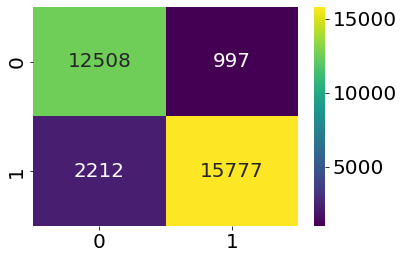

[0.898107576046231, 0.8951455182969503, 0.901605728491489, 0.896997837845523]

In [35]:
# y_pred=mlp.predict(New_X_test)
modelEvaluation(y_test, result, 'Multi-Layer Perceptron')

### 4) Neural Network

In [22]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_dim=New_X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
# compile the keras mode
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
history2 = model.fit(New_X_train, y_train, epochs=25, batch_size=100, validation_split=0.2)


Epoch 1/25
756/756 [==============================] - 2s 2ms/step - loss: 0.4796 - accuracy: 0.8273 - val_loss: 0.2946 - val_accuracy: 0.8861
Epoch 2/25
756/756 [==============================] - 1s 2ms/step - loss: 0.2706 - accuracy: 0.8919 - val_loss: 0.2568 - val_accuracy: 0.8945
Epoch 3/25
756/756 [==============================] - 1s 2ms/step - loss: 0.2458 - accuracy: 0.8975 - val_loss: 0.2402 - val_accuracy: 0.8992
Epoch 4/25
756/756 [==============================] - 1s 1ms/step - loss: 0.2330 - accuracy: 0.8992 - val_loss: 0.2309 - val_accuracy: 0.89830 - accuracy: 0.
Epoch 5/25
756/756 [==============================] - 1s 1ms/step - loss: 0.2266 - accuracy: 0.9000 - val_loss: 0.2286 - val_accuracy: 0.9016
Epoch 6/25
756/756 [==============================] - 2s 2ms/step - loss: 0.2236 - accuracy: 0.9007 - val_loss: 0.2252 - val_accuracy: 0.9019
Epoch 7/25
756/756 [==============================] - 1s 1ms/step - loss: 0.2223 - accuracy: 0.9014 - val_loss: 0.2243 - val_accurac

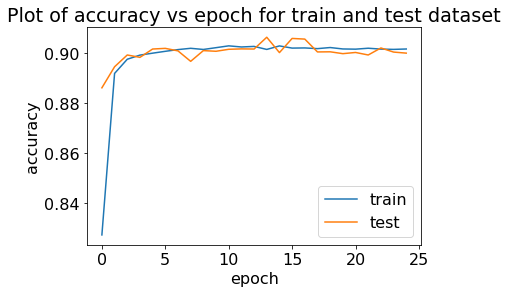

In [25]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
# plt.savefig('plots/mlp_multi_accuracy.png')
plt.show()

### Evaluation of Neural Network

In [26]:
y_pred1 = model.predict(New_X_test)
result = []
for i in y_pred1:
    if i > 0.5:
        result.append(1)
    else:
        result.append(0)

========== Neural Network ==========

Accuracy on validation set: 0.8981

Classification report : 
               precision    recall  f1-score   support

           0       0.85      0.93      0.89     13505
           1       0.94      0.88      0.91     17989

    accuracy                           0.90     31494
   macro avg       0.90      0.90      0.90     31494
weighted avg       0.90      0.90      0.90     31494



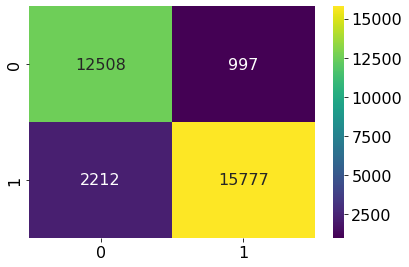

[0.898107576046231, 0.8951455182969503, 0.901605728491489, 0.896997837845523]

In [27]:
modelEvaluation(y_test, result,"Neural Network")